In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score

## Chargement du dataset

In [2]:
# Chargement
df = pd.read_csv('df_clean.csv')

In [3]:
# Encodage de la variable cible
df["Patient's Vital Status"] = df["Patient's Vital Status"].map({"Dead":1, "Alive":0})
df = df.dropna(subset=["Patient's Vital Status"])

In [4]:
# Split stratifié
X = df.drop(columns=["Patient's Vital Status"])
y = df["Patient's Vital Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [5]:
# Conversion des booléens en str pour OneHot
for col in X_train.select_dtypes(include="bool").columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

print("OK — X_test est prêt :", X_test.shape) # 38 patients et 7 variables

OK — X_test est prêt : (38, 6)


In [6]:
# Charger le meilleur modèle
best_model = joblib.load("data/processed/best_model.pkl")

In [7]:
# Prédictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

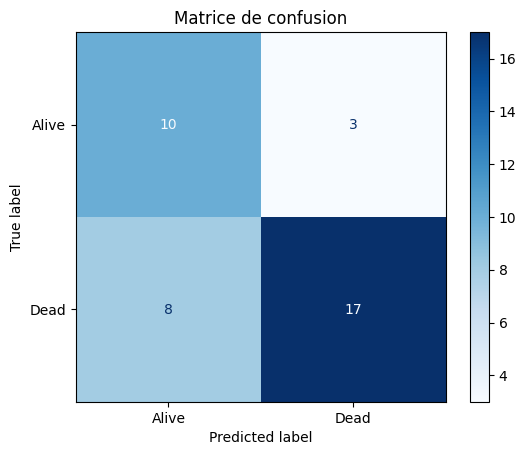

In [8]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Alive","Dead"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()

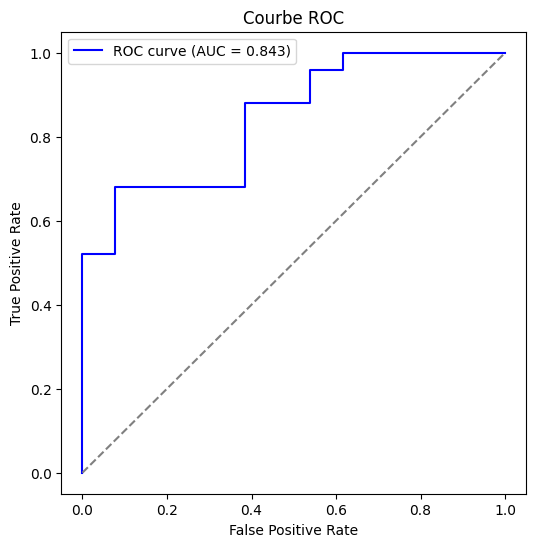

In [9]:
# Courbe ROC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.show()

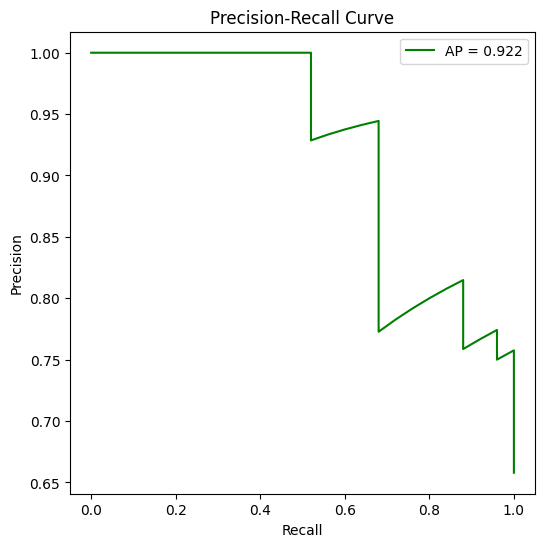

In [10]:
# Courbe Precision-Recall
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(recall_vals, precision_vals, color='green', label=f'AP = {ap:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [11]:
# Métriques supplémentaires
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}, AUC: {auc:.3f}")

Precision: 0.850, Recall: 0.680, F1: 0.756, AUC: 0.843
